In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.45.1
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.1.0
google-pasta                 0.2.0
grpcio                       1.59.3
h5py                         3.10.0
idna                         3.6
ipykernel                    6.26.0
ipython                      8.18.0
jedi                         0.19.1
jupyter_client               8.6.0


In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [7]:
# Process data

In [8]:
import cv2
import imghdr

C:\Users\bella\AppData\Local\Temp\ipykernel_16432\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir = 'skin problem'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [12]:
# Load data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('skin problem')

Found 283 files belonging to 3 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

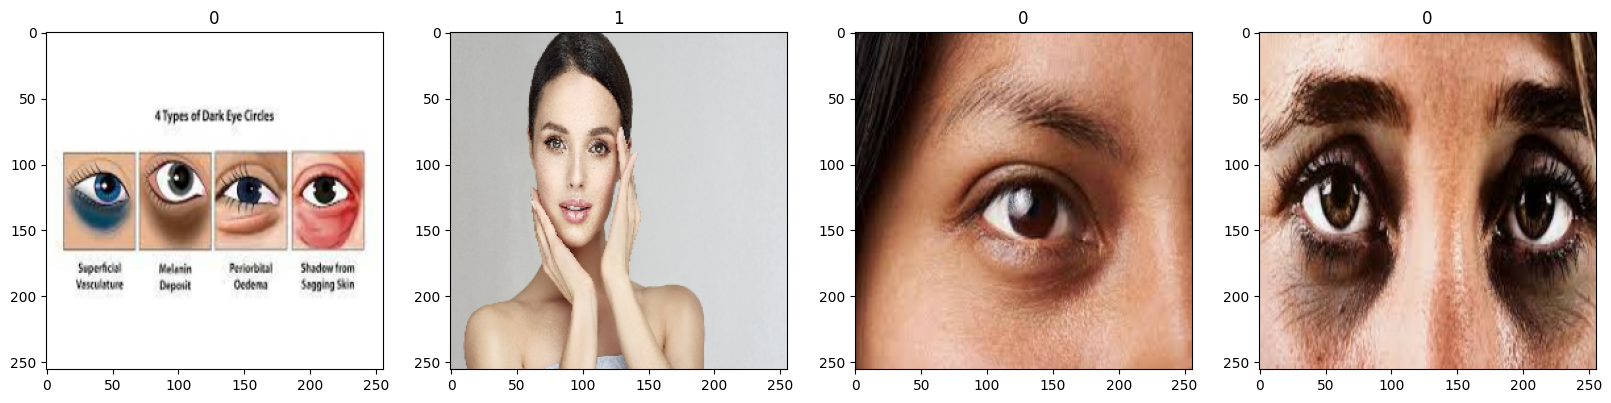

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
# Scale data

In [19]:
data = data.map(lambda x,y:(x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

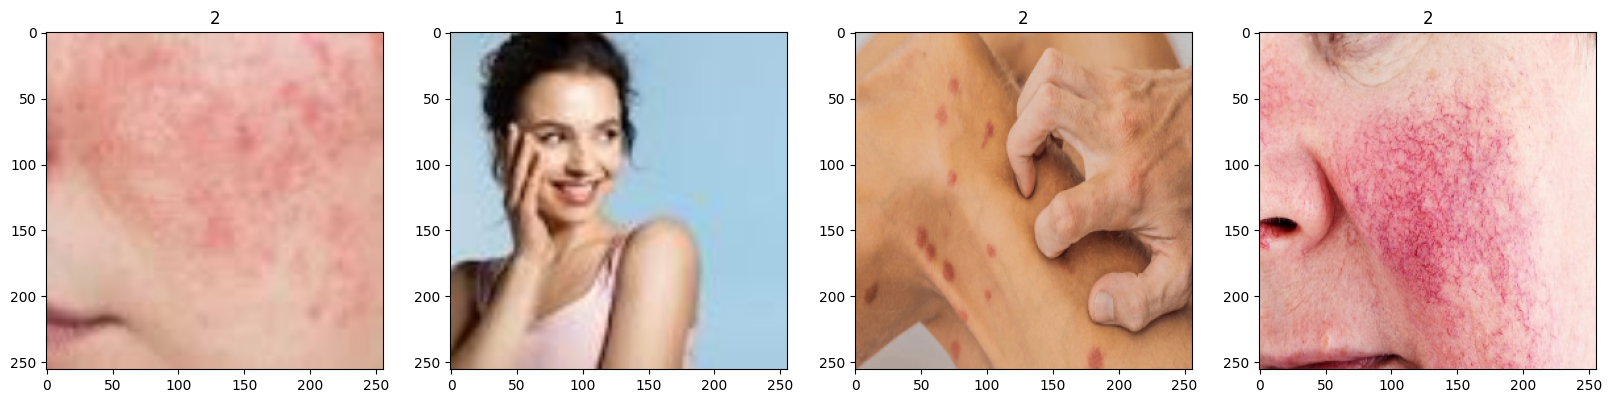

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
# Train test split

In [24]:
len(data)

9

In [25]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)+1

In [26]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [27]:
# Build model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [33]:
# Train model

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
results = model.fit(train,
                epochs=20,
                validation_data=test,
                callbacks=[tensorboard_callback])

Epoch 1/20



C:\Users\bella\skin\skin\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)



7/7 [==============================] - 10s 909ms/step - loss: 0.0000e+00 - accuracy: 0.3080 - val_loss: 0.0000e+00 - val_accuracy: 0.2542
Epoch 2/20
7/7 [==============================] - 8s 814ms/step - loss: 0.0000e+00 - accuracy: 0.2857 - val_loss: 0.0000e+00 - val_accuracy: 0.3051
Epoch 3/20
7/7 [==============================] - 8s 882ms/step - loss: 0.0000e+00 - accuracy: 0.3259 - val_loss: 0.0000e+00 - val_accuracy: 0.3390
Epoch 4/20
7/7 [==============================] - 8s 861ms/step - loss: 0.0000e+00 - accuracy: 0.2946 - val_loss: 0.0000e+00 - val_accuracy: 0.3051
Epoch 5/20
7/7 [==============================] - 8s 849ms/step - loss: 0.0000e+00 - accuracy: 0.3036 - val_loss: 0.0000e+00 - val_accuracy: 0.3729
Epoch 6/20
7/7 [==============================] - 8s 825ms/step - loss: 0.0000e+00 - accuracy: 0.3438 - val_loss: 0.0000e+00 - val_accuracy: 0.2712
Epoch 7/20
7/7 [==============================] - 8s 844ms/step - loss: 0.0000e+00 - accuracy: 0.3348 - val_loss: 0.0000e

In [37]:
# Evaluation
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [38]:
pre = Precision()
rc = Recall()
cacc = CategoricalAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rc.update_state(y, yhat)
    cacc.update_state(y, yhat)

1/1 [==============================] - 0s 152ms/step


In [40]:
print(f'Precision: {pre.result().numpy()}, Recall: {rc.result().numpy()}, Acc: {cacc.result().numpy()}')

Precision: 0.6666666865348816, Recall: 1.0, Acc: 0.5


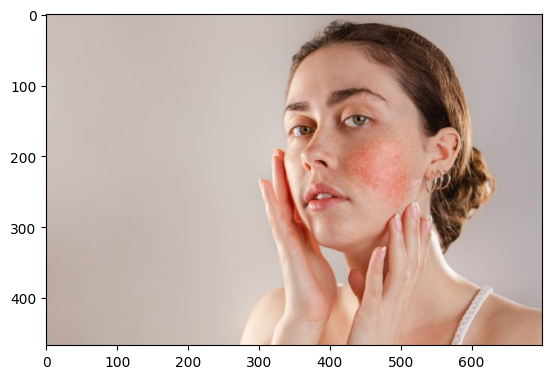

In [52]:
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
resize = tf.image.resize(img, (256, 256))

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [55]:
yhat

array([[1.]], dtype=float32)

In [56]:
# Summary of the model
if yhat < 0.5:
    print(f'Dark circle.')
elif 0.5 < yhat < 1:
    print(f'Normal skin.')
else:
    print(f'Skin redness.')

Skin redness.
